## **Dataset 2.CSV**

## **1. Plot the Graph**

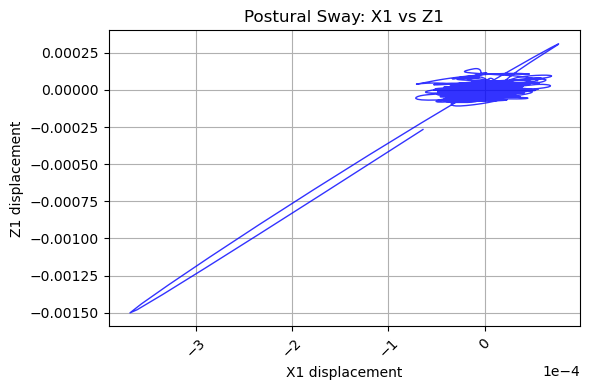

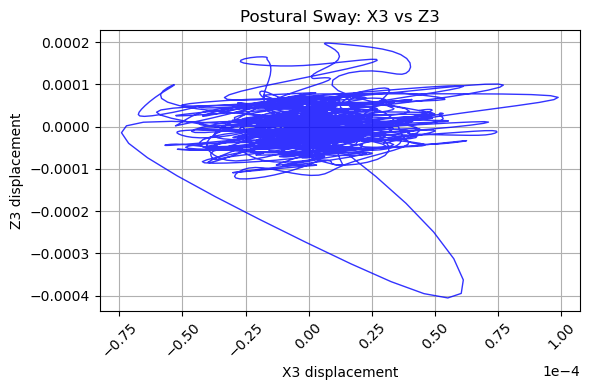

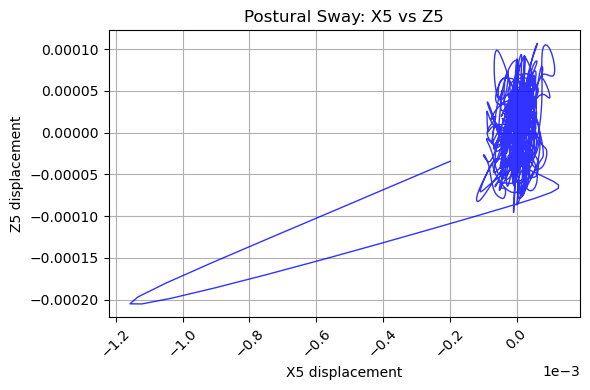

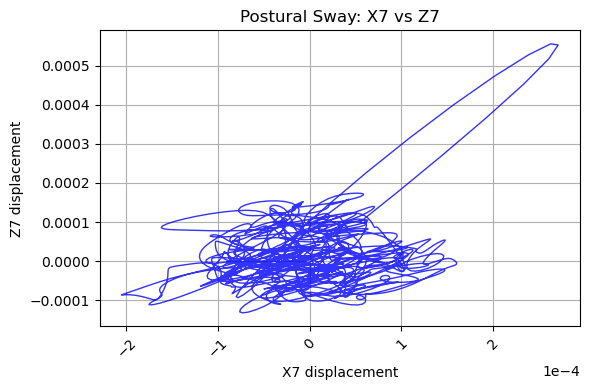

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Load CSV
df = pd.read_csv('2.csv')

# Get all X-Z pairs automatically
x_columns = sorted([col for col in df.columns if col.startswith('X')])
z_columns = sorted([col for col in df.columns if col.startswith('Z')])

# Plot each X-Z pair individually
for x_col, z_col in zip(x_columns, z_columns):
    plt.figure(figsize=(6,4))
    
    # Extract all points for this pair over time
    X_points = df[x_col].values
    Z_points = df[z_col].values
    
    # Plot as a thin line
    plt.plot(X_points, Z_points, linewidth=1, alpha=0.8, color='blue')
    
    plt.xlabel(f'{x_col} displacement')
    plt.ylabel(f'{z_col} displacement')
    plt.title(f'Postural Sway: {x_col} vs {z_col}')
    plt.grid(True)
    
    # Improve x-axis readability
    plt.xticks(rotation=45)  # rotate labels
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # scientific notation
    plt.tight_layout()  # prevent clipping of labels
    
    plt.show()


## **2. Compute the Center of Sway**

Center of sway for X1-Z1: (-0.000001, -0.000005)


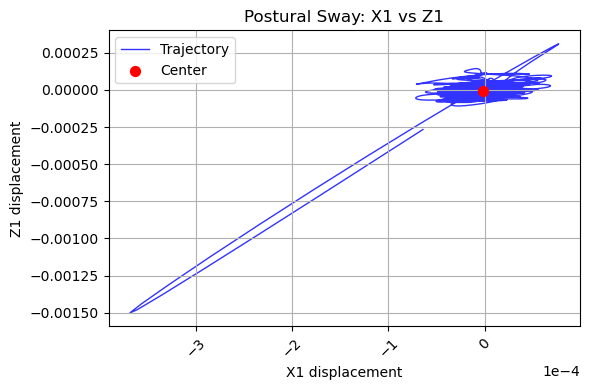

Center of sway for X3-Z3: (0.000001, 0.000002)


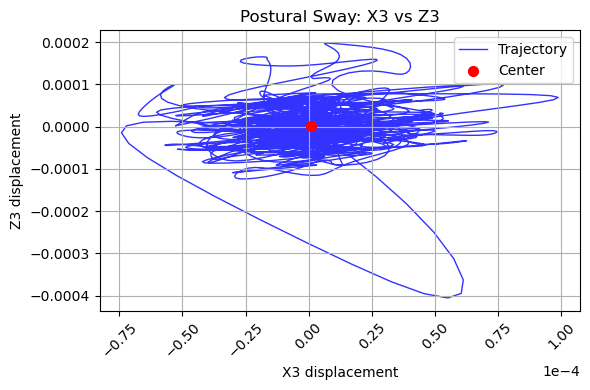

Center of sway for X5-Z5: (-0.000002, 0.000002)


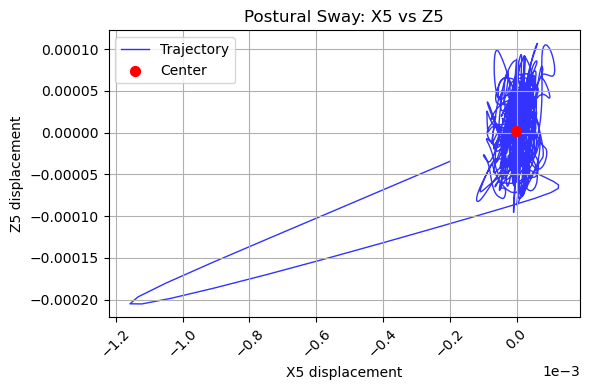

Center of sway for X7-Z7: (-0.000001, 0.000011)


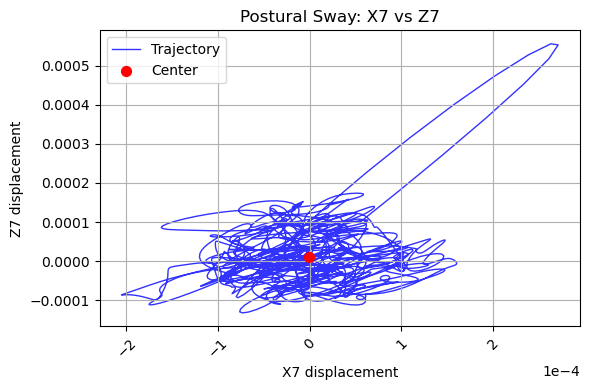

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('2.csv')

# Get all X-Z pairs automatically
x_columns = sorted([col for col in df.columns if col.startswith('X')])
z_columns = sorted([col for col in df.columns if col.startswith('Z')])

# Loop through each X-Z pair
for x_col, z_col in zip(x_columns, z_columns):
    X_points = df[x_col].values
    Z_points = df[z_col].values
    
    # Step 1: compute center of sway
    center_X = X_points.mean()
    center_Z = Z_points.mean()
    
    print(f"Center of sway for {x_col}-{z_col}: ({center_X:.6f}, {center_Z:.6f})")
    
    # Plot the trajectory
    plt.figure(figsize=(6,4))
    # Plot the trajectory first
    plt.plot(X_points, Z_points, linewidth=1, alpha=0.8, color='blue', label='Trajectory', zorder=1)
    
    # Plot the center on top
    plt.scatter(center_X, center_Z, color='red', s=50, label='Center', zorder=2)

    
    plt.xlabel(f'{x_col} displacement')
    plt.ylabel(f'{z_col} displacement')
    plt.title(f'Postural Sway: {x_col} vs {z_col}')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.show()


## **3. Compute Vector, Angle, and Magnitude**


X1-Z1 vectors (first 5 points):
Point 0: Vector=(-0.000063, -0.000261), Magnitude=0.000268, Angle=-1.81 rad
Point 1: Vector=(-0.000111, -0.000463), Magnitude=0.000476, Angle=-1.81 rad
Point 2: Vector=(-0.000171, -0.000708), Magnitude=0.000729, Angle=-1.81 rad
Point 3: Vector=(-0.000233, -0.000964), Magnitude=0.000992, Angle=-1.81 rad
Point 4: Vector=(-0.000290, -0.001195), Magnitude=0.001230, Angle=-1.81 rad


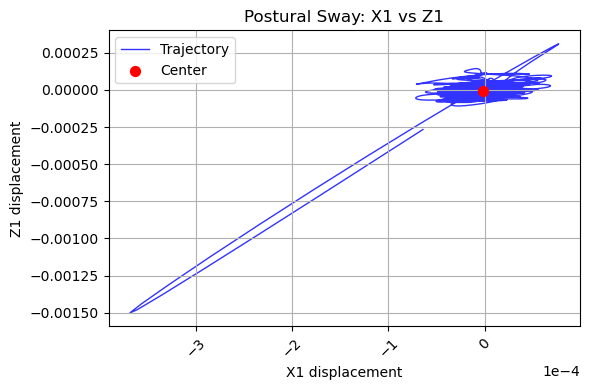


X3-Z3 vectors (first 5 points):
Point 0: Vector=(0.000015, -0.000068), Magnitude=0.000069, Angle=-1.36 rad
Point 1: Vector=(0.000025, -0.000119), Magnitude=0.000122, Angle=-1.36 rad
Point 2: Vector=(0.000037, -0.000183), Magnitude=0.000187, Angle=-1.37 rad
Point 3: Vector=(0.000048, -0.000251), Magnitude=0.000255, Angle=-1.38 rad
Point 4: Vector=(0.000056, -0.000314), Magnitude=0.000319, Angle=-1.39 rad


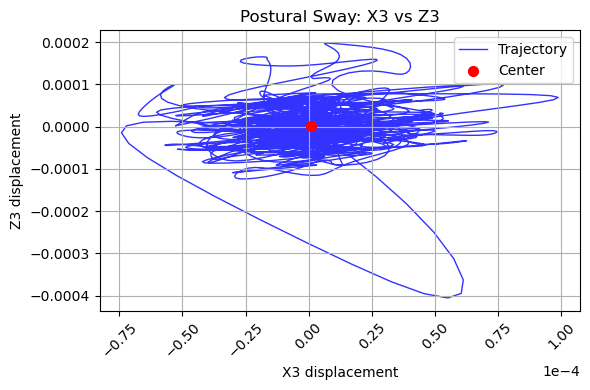


X5-Z5 vectors (first 5 points):
Point 0: Vector=(-0.000197, -0.000037), Magnitude=0.000201, Angle=-2.96 rad
Point 1: Vector=(-0.000349, -0.000063), Magnitude=0.000355, Angle=-2.96 rad
Point 2: Vector=(-0.000535, -0.000094), Magnitude=0.000543, Angle=-2.97 rad
Point 3: Vector=(-0.000730, -0.000127), Magnitude=0.000741, Angle=-2.97 rad
Point 4: Vector=(-0.000908, -0.000158), Magnitude=0.000921, Angle=-2.97 rad


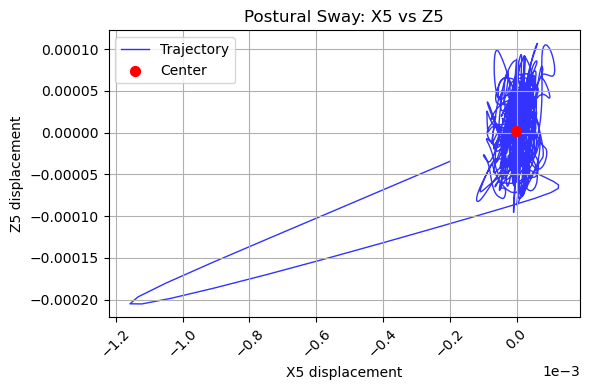


X7-Z7 vectors (first 5 points):
Point 0: Vector=(0.000057, 0.000091), Magnitude=0.000107, Angle=1.01 rad
Point 1: Vector=(0.000098, 0.000167), Magnitude=0.000194, Angle=1.04 rad
Point 2: Vector=(0.000146, 0.000260), Magnitude=0.000298, Angle=1.06 rad
Point 3: Vector=(0.000194, 0.000356), Magnitude=0.000406, Angle=1.07 rad
Point 4: Vector=(0.000235, 0.000442), Magnitude=0.000501, Angle=1.08 rad


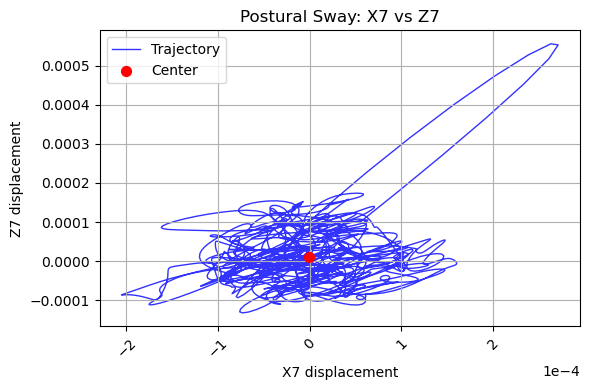

In [6]:
import numpy as np

# Loop through each X-Z pair
for x_col, z_col in zip(x_columns, z_columns):
    X_points = df[x_col].values
    Z_points = df[z_col].values
    
    # Step 1: compute center of sway
    center_X = X_points.mean()
    center_Z = Z_points.mean()
    
    # Step 2: compute vectors from center
    Vx = X_points - center_X
    Vz = Z_points - center_Z
    
    # Compute magnitude of each vector
    magnitudes = np.sqrt(Vx**2 + Vz**2)
    
    # Compute angle of each vector relative to center (in radians)
    angles = np.arctan2(Vz, Vx)
    
    # Optional: print first few values for demonstration
    print(f"\n{x_col}-{z_col} vectors (first 5 points):")
    for i in range(min(5, len(X_points))):
        print(f"Point {i}: Vector=({Vx[i]:.6f}, {Vz[i]:.6f}), Magnitude={magnitudes[i]:.6f}, Angle={angles[i]:.2f} rad")
    
    # Plot trajectory and center for reference
    plt.figure(figsize=(6,4))
    plt.plot(X_points, Z_points, linewidth=1, alpha=0.8, color='blue', zorder=1, label='Trajectory')
    plt.scatter(center_X, center_Z, color='red', s=50, zorder=2, label='Center')
    
    plt.xlabel(f'{x_col} displacement')
    plt.ylabel(f'{z_col} displacement')
    plt.title(f'Postural Sway: {x_col} vs {z_col}')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.show()


## **4. Plot the Boundary / Polygon**

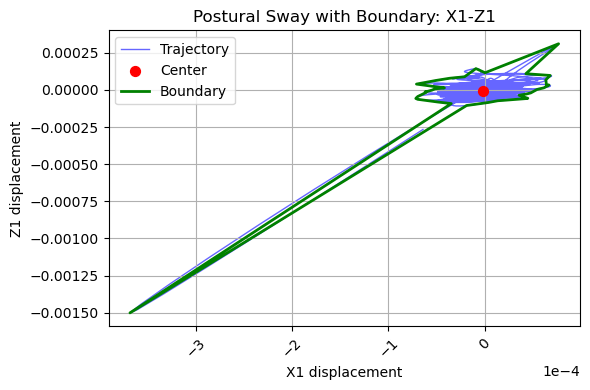

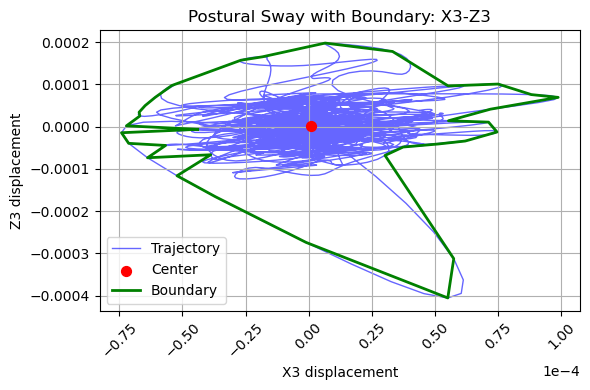

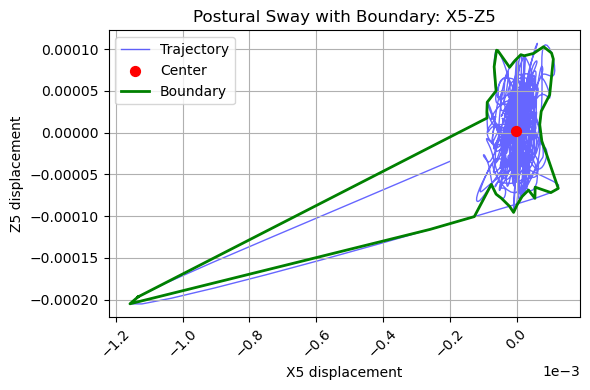

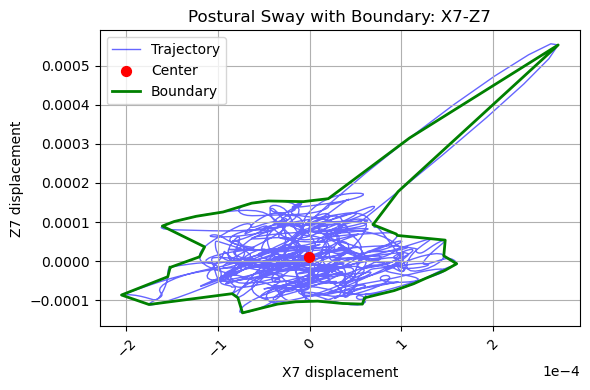

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('2.csv')

# Get all X-Z pairs automatically
x_columns = sorted([col for col in df.columns if col.startswith('X')])
z_columns = sorted([col for col in df.columns if col.startswith('Z')])

# Number of sectors to divide the circle (more sectors = finer boundary)
num_sectors = 36  # 36 sectors → 10 degrees each

for x_col, z_col in zip(x_columns, z_columns):
    X_points = df[x_col].values
    Z_points = df[z_col].values
    
    # Step 1: center
    center_X = X_points.mean()
    center_Z = Z_points.mean()
    
    # Step 2: vectors, magnitude, angles
    Vx = X_points - center_X
    Vz = Z_points - center_Z
    magnitudes = np.sqrt(Vx**2 + Vz**2)
    angles = np.arctan2(Vz, Vx)  # -pi to pi
    
    # Step 3: divide angles into sectors and pick outermost point per sector
    sector_edges = np.linspace(-np.pi, np.pi, num_sectors+1)
    outer_X = []
    outer_Z = []

    for i in range(num_sectors):
        mask = (angles >= sector_edges[i]) & (angles < sector_edges[i+1])
        if np.any(mask):
            # Pick the point with largest magnitude in this sector
            idx = np.argmax(magnitudes[mask])
            outer_X.append(X_points[mask][idx])
            outer_Z.append(Z_points[mask][idx])
    
    # Sort outer points by angle for polygon plotting
    outer_angles = np.arctan2(np.array(outer_Z)-center_Z, np.array(outer_X)-center_X)
    sorted_idx = np.argsort(outer_angles)
    outer_X = np.array(outer_X)[sorted_idx]
    outer_Z = np.array(outer_Z)[sorted_idx]
    
    # Plot trajectory, center, and boundary polygon
    plt.figure(figsize=(6,4))
    plt.plot(X_points, Z_points, linewidth=1, alpha=0.6, color='blue', label='Trajectory', zorder=1)
    plt.scatter(center_X, center_Z, color='red', s=50, label='Center', zorder=2)
    plt.plot(np.append(outer_X, outer_X[0]), np.append(outer_Z, outer_Z[0]), 
             color='green', linewidth=2, label='Boundary', zorder=3)  # close polygon
    
    plt.xlabel(f'{x_col} displacement')
    plt.ylabel(f'{z_col} displacement')
    plt.title(f'Postural Sway with Boundary: {x_col}-{z_col}')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.show()


## **5. Compute the Sway Area of the Polygon**

Sway area for X1-Z1: 3.902e-08 m²
Sway area for X1-Z1: 3.902e-02 mm²


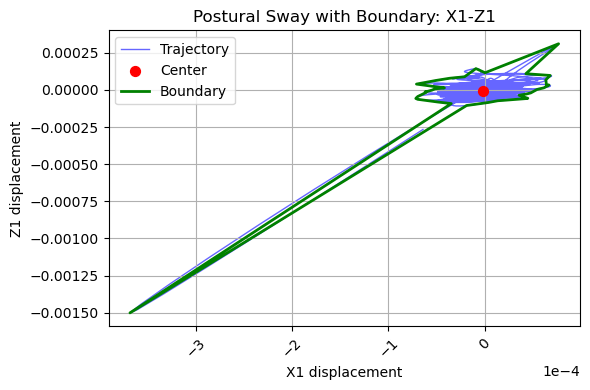

Sway area for X3-Z3: 4.756e-08 m²
Sway area for X3-Z3: 4.756e-02 mm²


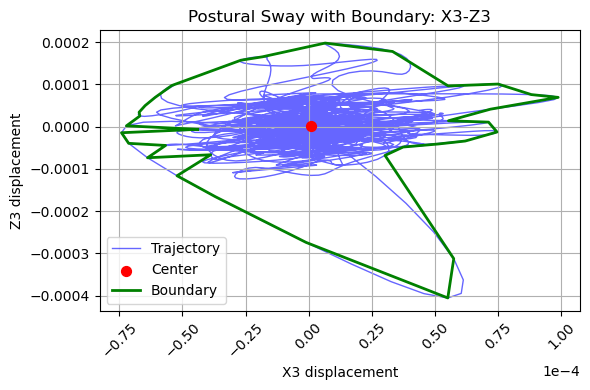

Sway area for X5-Z5: 9.280e-08 m²
Sway area for X5-Z5: 9.280e-02 mm²


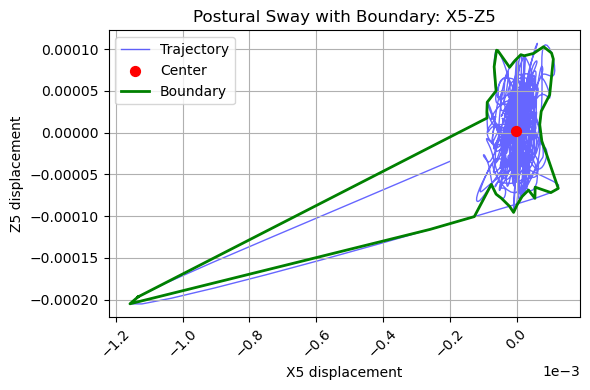

Sway area for X7-Z7: 8.069e-08 m²
Sway area for X7-Z7: 8.069e-02 mm²


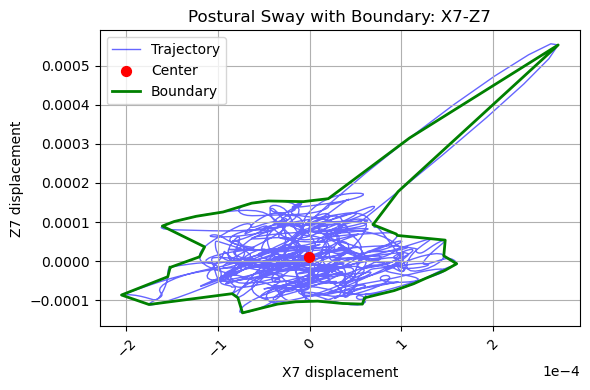

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('2.csv')

# Get all X-Z pairs automatically
x_columns = sorted([col for col in df.columns if col.startswith('X')])
z_columns = sorted([col for col in df.columns if col.startswith('Z')])

num_sectors = 36  # sectors for outer boundary

for x_col, z_col in zip(x_columns, z_columns):
    X_points = df[x_col].values
    Z_points = df[z_col].values
    
    # Step 1: center
    center_X = X_points.mean()
    center_Z = Z_points.mean()
    
    # Step 2: vectors, magnitude, angles
    Vx = X_points - center_X
    Vz = Z_points - center_Z
    magnitudes = np.sqrt(Vx**2 + Vz**2)
    angles = np.arctan2(Vz, Vx)
    
    # Step 3: find outer points
    sector_edges = np.linspace(-np.pi, np.pi, num_sectors+1)
    outer_X = []
    outer_Z = []

    for i in range(num_sectors):
        mask = (angles >= sector_edges[i]) & (angles < sector_edges[i+1])
        if np.any(mask):
            idx = np.argmax(magnitudes[mask])
            outer_X.append(X_points[mask][idx])
            outer_Z.append(Z_points[mask][idx])
    
    # Sort outer points by angle
    outer_angles = np.arctan2(np.array(outer_Z)-center_Z, np.array(outer_X)-center_X)
    sorted_idx = np.argsort(outer_angles)
    outer_X = np.array(outer_X)[sorted_idx]
    outer_Z = np.array(outer_Z)[sorted_idx]
    
    # Step 4: compute polygon area (shoelace formula)
    n = len(outer_X)
    area = 0.5 * abs(np.dot(outer_X, np.roll(outer_Z, -1)) -
                     np.dot(outer_Z, np.roll(outer_X, -1)))

    # ---- UPDATED PRINTS USING SCIENTIFIC NOTATION ----
    print(f"Sway area for {x_col}-{z_col}: {area:.3e} m²")
    
    area_mm2 = area * 1e6
    print(f"Sway area for {x_col}-{z_col}: {area_mm2:.3e} mm²")
    # --------------------------------------------------

    # Plot trajectory, center, boundary
    plt.figure(figsize=(6,4))
    plt.plot(X_points, Z_points, linewidth=1, alpha=0.6, color='blue', label='Trajectory', zorder=1)
    plt.scatter(center_X, center_Z, color='red', s=50, label='Center', zorder=2)
    plt.plot(np.append(outer_X, outer_X[0]), np.append(outer_Z, outer_Z[0]), 
             color='green', linewidth=2, label='Boundary', zorder=3)
    
    plt.xlabel(f'{x_col} displacement')
    plt.ylabel(f'{z_col} displacement')
    plt.title(f'Postural Sway with Boundary: {x_col}-{z_col}')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.show()


## **5a. Just the Sway Area without the Graphs**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('2.csv')

# Get all X-Z pairs automatically
x_columns = sorted([col for col in df.columns if col.startswith('X')])
z_columns = sorted([col for col in df.columns if col.startswith('Z')])

num_sectors = 36  # sectors for outer boundary

for x_col, z_col in zip(x_columns, z_columns):
    X_points = df[x_col].values
    Z_points = df[z_col].values
    
    # Step 1: center
    center_X = X_points.mean()
    center_Z = Z_points.mean()
    
    # Step 2: vectors, magnitude, angles
    Vx = X_points - center_X
    Vz = Z_points - center_Z
    magnitudes = np.sqrt(Vx**2 + Vz**2)
    angles = np.arctan2(Vz, Vx)
    
    # Step 3: find outer points
    sector_edges = np.linspace(-np.pi, np.pi, num_sectors+1)
    outer_X = []
    outer_Z = []

    for i in range(num_sectors):
        mask = (angles >= sector_edges[i]) & (angles < sector_edges[i+1])
        if np.any(mask):
            idx = np.argmax(magnitudes[mask])
            outer_X.append(X_points[mask][idx])
            outer_Z.append(Z_points[mask][idx])
    
    # Sort outer points by angle
    outer_angles = np.arctan2(np.array(outer_Z)-center_Z, np.array(outer_X)-center_X)
    sorted_idx = np.argsort(outer_angles)
    outer_X = np.array(outer_X)[sorted_idx]
    outer_Z = np.array(outer_Z)[sorted_idx]
    
    # Step 4: compute polygon area (shoelace formula)
    area = 0.5 * abs(np.dot(outer_X, np.roll(outer_Z, -1)) -
                     np.dot(outer_Z, np.roll(outer_X, -1)))

    # ---- SINGLE OUTPUT LINE ----
    print(f"Sway area for {x_col}-{z_col}: {area:.3e} m²")



Sway area for X1-Z1: 3.902e-08 m²
Sway area for X3-Z3: 4.756e-08 m²
Sway area for X5-Z5: 9.280e-08 m²
Sway area for X7-Z7: 8.069e-08 m²
